# ASSIGNMENT 6 - INTRO TO MACHINE LEARNING | Convolutional Neural Network 

> **FULL MARKS = 100**


**Note:** To submit the assignment, please follow the same steps as in assignments 1-5.

In this assignemnt, we will go through an images classification task. You will get familiar with one kind of frequently used deep learning neural networks, Convolutional Neural Network. Based on what you learned from the classes and examples given, you are expected to finish one small task using such model. Including create deep learning model, prepare the data, trainig, testing and evaluation. 

1. **Convolutional Neural Networks (Image Classification)| SCORE : 100**
      


In [1]:
""""
!!!!!!!!! WARNING !!!!!!!!!

THIS ASSIGNMENT WILL RUN VERY SLOW ON A CPU COMPUTER
USE GOOGLE COLAB MAYBE A BETTER OPTION

PLEASE CHANGE YOUR RUNTYPE

1. Go to Runtime
2. Go to change runtime type
3. Select Hardware Accelerator as GPU and SAVE

"""
print()

In [3]:
# Since we will be working in larger files it is wise to load google drive
# We assume your google drive is not full yet

# Create a folder named ASSGN6-Data on your google drive
# Upload food101small.zip to this folder
# food101small is a dataset for our convolution neural network task
# Upload assignment jupyter notebook to googlde drive as well

# Mount google drive from 
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [4]:
# Copy the dataset to the current running environment 
!cp /content/drive/MyDrive/ASSGN7-Data/* ./

'cp' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
# Unzip the dataset
!unzip -q food101small.zip

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
# Take a look what we have here
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
# Lets see if you have loaded gpu or not
!nvidia-smi

Tue Apr  8 14:10:09 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.36                 Driver Version: 566.36         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3080      WDDM  |   00000000:01:00.0  On |                  N/A |
| 53%   45C    P3            107W /  390W |    5536MiB /  12288MiB |     38%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [8]:
# Generally when we implement neural network there are fundamental major steps
"""
STEP 1: DATA
        - know your data
        - get your data
        - create data loading pipe - line
          - Load all data in memory (If your entire dataset is smaller and can fit in memory, usually your data doesn't fit in memory)
          - Load part of data(from disk) to memory(generally this is the case) and create pool of loading and data feeding to your model
          - If necessary implement data transformation (resize, standardize etc.)
          - Data Augmentation for better results(Data Augmentation is not done in evaluation set (test or val))

STEP 2: CREATE MODEL
        FOR THIS PART YOU WILL BE FOLLOWING AN EXAMPLE FROM TENSORFLOW ITSELF
        Note : For this we will use tensorflow.keras api, (note: version of tensorflow we are using is 2.0)
        - Define network architecture
        - Compile your model
        - Define Loss(Objective) Function
        - Define Metrics
        - Define Optimizer
        - ..... (There are many more details but we will skip other for now)

STEP 3: TRAIN MODEL
        FOR THIS PART YOU WILL BE FOLLOWING AN EXAMPLE FROM TENSORFLOW ITSELF
        - Define trainig strategies, (learning_rate, batch_size, epoch_size, .....)
        - Define a training function(or loop) or implement available .fit function
        - Evaluate model on test set after one cycle on train is done(that is called as 1 epoch)

STEP 4: DEPLOY MODEL
        - If your model is good you can deploy your model for application purpose
"""       
print()

# Convolution Neural Network | Image Classification

## STEP 1 : Prepare the Data

In [9]:
# For this Task we will be using a dataset called as FOOD101
# You can find this dataset 
# However, the one that we use here is a smaller version of food101
# We sample random 10 classes for this assignment
# Here's the reference of FOOD101 dataset original paper
"""
@inproceedings{bossard14,
  title = {Food-101 -- Mining Discriminative Components with Random Forests},
  author = {Bossard, Lukas and Guillaumin, Matthieu and Van Gool, Luc},
  booktitle = {European Conference on Computer Vision},
  year = {2014}
}
"""
print()

In [10]:
# Lets load tensorflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.19.0'

In [11]:
## Create Dataloading Pipeline
from pathlib import Path
data_dir = Path('./food101small/')
train_dir = Path('./food101small/train')
test_dir = Path('./food101small/test')

print(f"total images \t: {len(list(data_dir.glob('*/*/*.jpg')))}")
print(f"train images \t: {len(list(data_dir.glob('train/*/*.jpg')))}")
print(f"test images \t: {len(list(data_dir.glob('test/*/*.jpg')))}")
print(f"num classes \t: {len(list(data_dir.glob('train/*')))}")
print("\nClasses")

CLASS_NAMES = np.array([i.name for i in data_dir.glob('train/*')])

for i,cls in enumerate(CLASS_NAMES):
  print(f'{i}.{cls}')

total images 	: 10000
train images 	: 9000
test images 	: 1000
num classes 	: 10

Classes
0.apple_pie
1.baby_back_ribs
2.baklava
3.beef_carpaccio
4.beef_tartare
5.beet_salad
6.beignets
7.bibimbap
8.bread_pudding
9.breakfast_burrito


In [12]:
# Lets create a data generator
# We do 1./255 to convert image pixel 0-255(uint8) to 0-1(float)
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [13]:
image_count = len(list(data_dir.glob('train/*/*.jpg')))
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [14]:
# We will create our train_data_generator using following lines of code
# directory is the path to our directory which is food101small
# batch_size is number of images that will be loaded at one step each time
# Shuffle True means we will shuffle dataset and feed randomly
# Since our image sizes are different we need some standard image size we need target size of fix height and width
# classes refers to the class names
train_data_gen = image_generator.flow_from_directory(directory=str(train_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))


# Now let us create test data generator
test_data_gen = image_generator.flow_from_directory(directory=str(test_dir),
                                                    batch_size = BATCH_SIZE,
                                                    shuffle = True,
                                                    target_size = (IMG_HEIGHT, IMG_WIDTH),
                                                    classes = list(CLASS_NAMES))

Found 9003 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


In [15]:
# This is a helper function
# Reference : https://www.tensorflow.org/tutorials/keras/classification
# We will use this function to show random 100 images
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')

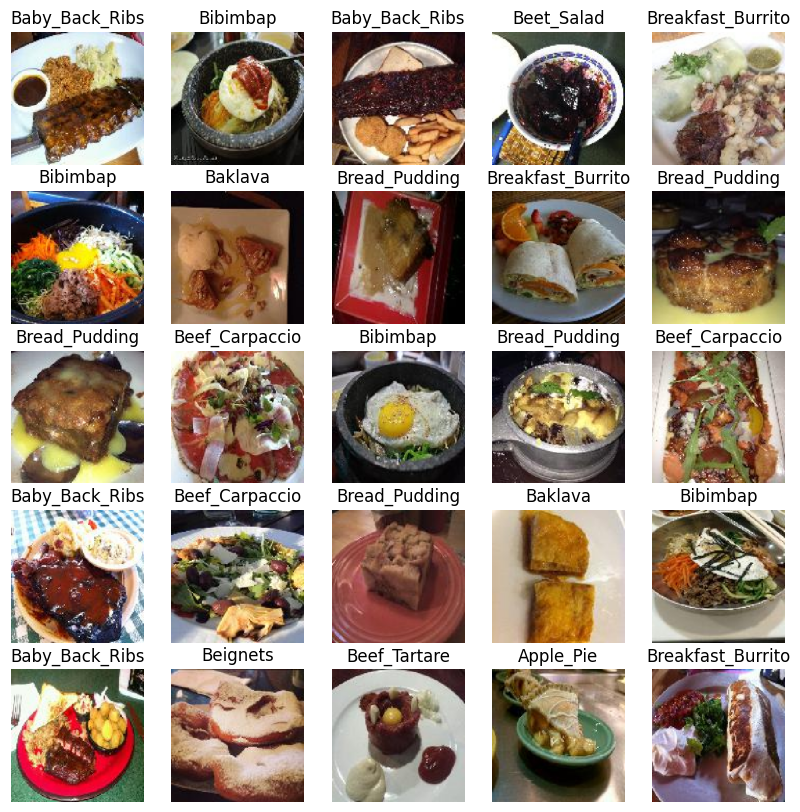

In [16]:
# Let us see random images in our training data
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

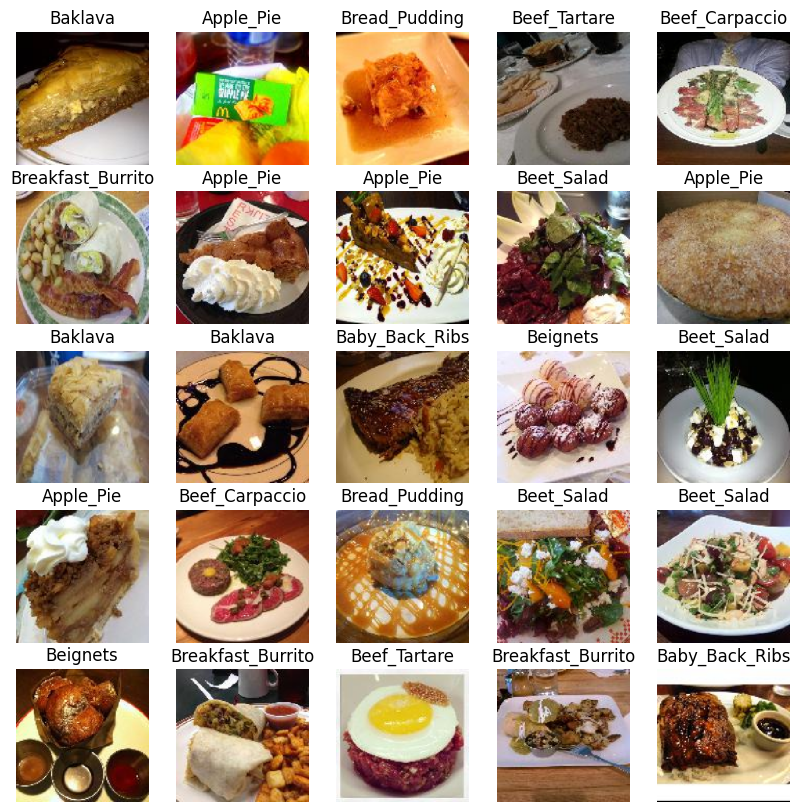

In [17]:
# Let us see random images in our test data
image_batch, label_batch = next(test_data_gen)
show_batch(image_batch, label_batch) 

In [18]:
# But our image_generator for training is not good
# One very important techniques to improve our model is to use augmented image
# Augmentation refers to random image transformation techniques
# To know more you can study following link
# https://medium.com/@ODSC/image-augmentation-for-convolutional-neural-networks-18319e1291c

# Let us change our train_data generator

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
  rescale = 1/255.,
  rotation_range=20,
  width_shift_range=0.2,
  height_shift_range=0.2,
  horizontal_flip=True)

train_data_gen = image_generator.flow_from_directory(directory=str(train_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 9003 images belonging to 10 classes.


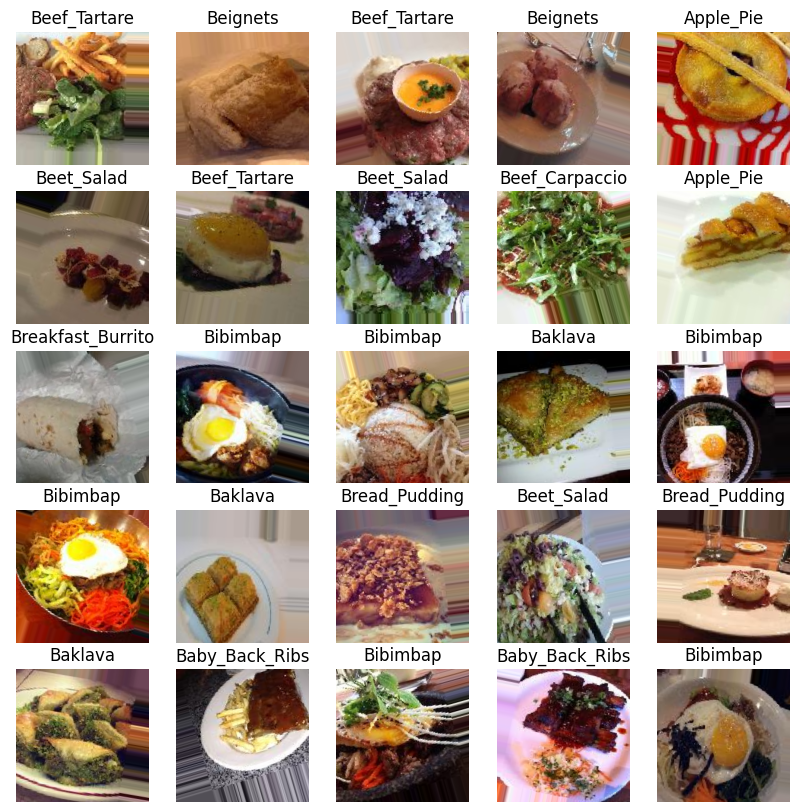

In [19]:
# Now let us see what happens after augmentation
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [20]:
# Now before moving forward lets see the nature of our training data
# As you might have noticed we can get first batch of images using following lines of code
image_batch, label_batch = next(train_data_gen)

# Or you can call it 
xtrain, ytrain = next(train_data_gen)

In [21]:
# Lets see the type of our data
print(f'xtrain and ytrain types : {type(xtrain), type(ytrain)}')
print(f'xtrain and ytrain shapes : {xtrain.shape,ytrain.shape}')

xtrain and ytrain types : (<class 'numpy.ndarray'>, <class 'numpy.ndarray'>)
xtrain and ytrain shapes : ((32, 224, 224, 3), (32, 10))


(224, 224, 3)


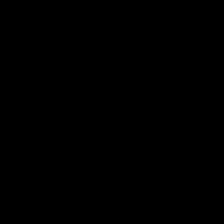

In [22]:
# So what is this shape? You might wonder
# xtrain has a shape of (32, 224, 224, 3)
# Here 32 means batch, number of images per time
# 224,224 is dimension of image that is height and width
# Similarly xtrai has 3 at last what does this mean??
# This means our image has 3 layers of 224x224 matrix stacked together
# Which are called as color channel(RGB)

# To make things clear lets see one by one
# I will import a library called as pillow this will help us visualize image 
from PIL import Image
# Lets take our first image
print(xtrain[0].shape)
Image.fromarray((xtrain[0]).astype(np.uint8))

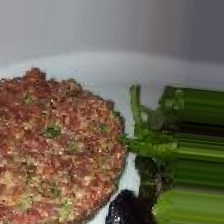

In [23]:
# Oh!! wait we forgot to upscale back to 255 (we rescaled down to 0-1 previously)
Image.fromarray((xtrain[0]*255.).astype(np.uint8))

In [24]:
# Now let see first layer of first image
# Here is the trick
# xtrain[dim0,dim1,dim2,dim3]
# if you use dim0 = 0, eg. above case xtrain[0], only dim0 it means first image
# if you use dim0 = 0:5 eg. xtrain[0:5] first 5 images
# if you use dim0 = :10 eg. xtrain[:10] first 10 images
# if you use dim0 = 10: eg. xtrain[10:] except first 10 images take all
# if you use dim0 = -10: eg. xtrain[-10:] last 10 images and so on

# This is applicable to all dimension

# Now to take first layer 'R' from RGB from first image we do
# Note:, if you just mention ':' this means all
print(xtrain[0,:,:,0].shape) # this is R layer of first image
firstimage = (xtrain[0] * 255.).astype(np.uint8)

(224, 224)


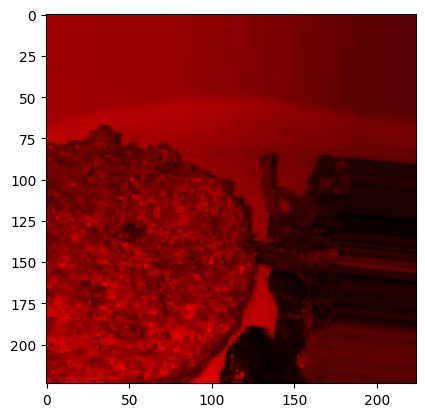

In [25]:
# To visualize Red channel we need to do some techniques
red = np.zeros(firstimage.shape).astype(np.uint8)
red[:,:,0] = firstimage[:,:,0]
plt.imshow(red)

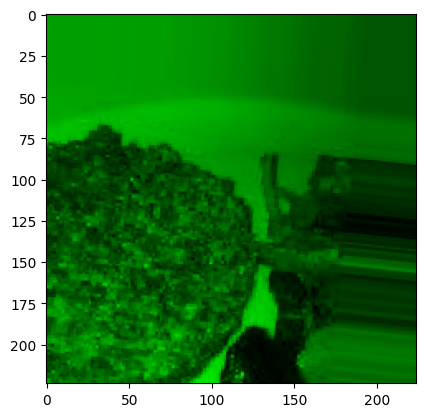

In [26]:
# To visualize Red channel we need to do some techniques
green = np.zeros(firstimage.shape).astype(np.uint8)
green[:,:,1] = firstimage[:,:,1]
plt.imshow(green)

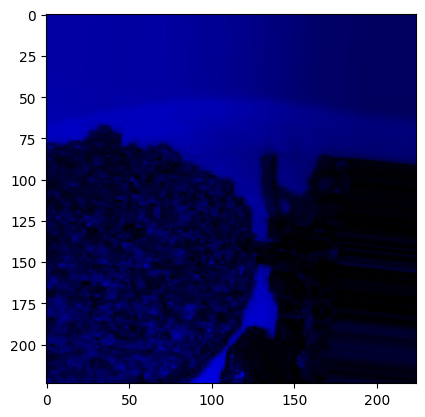

In [27]:
# To visualize Red channel we need to do some techniques
blue = np.zeros(firstimage.shape).astype(np.uint8)
blue[:,:,2] = firstimage[:,:,2]
plt.imshow(blue)

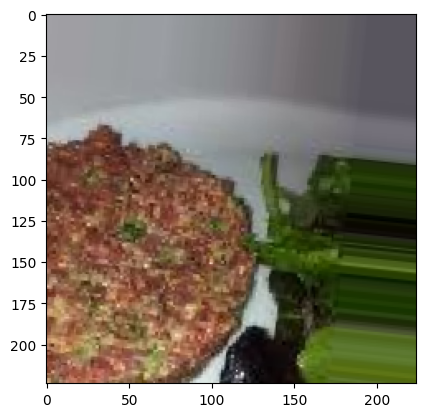

In [28]:
# Now when you visualize an image you will see mixed combinations of all those channels
# and see following
original = red + green + blue
plt.imshow(original)

In [29]:
# Important take away
# (32,224, 224,3) represent one trainnig sample for our model
# Nubmer of features we have per sample is 224*224*3 = 150528

In [30]:
# Now lets have a look in our ytrain
ytrain.shape

(32, 10)

In [31]:
# So it is no clear that we have 32 samples 
# Here 10 represents number of classes we have but why 10??

# Lets see first ytrain
ytrain[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [32]:
# weird?? only one '1' and rest 0
# Let's see what position it is at
np.argmax(ytrain[0])

4

In [33]:
# Let's see what label this position refers to 
CLASS_NAMES[np.argmax(ytrain[0])]

'beef_tartare'

Text(0.5, 25.722222222222214, 'classes')

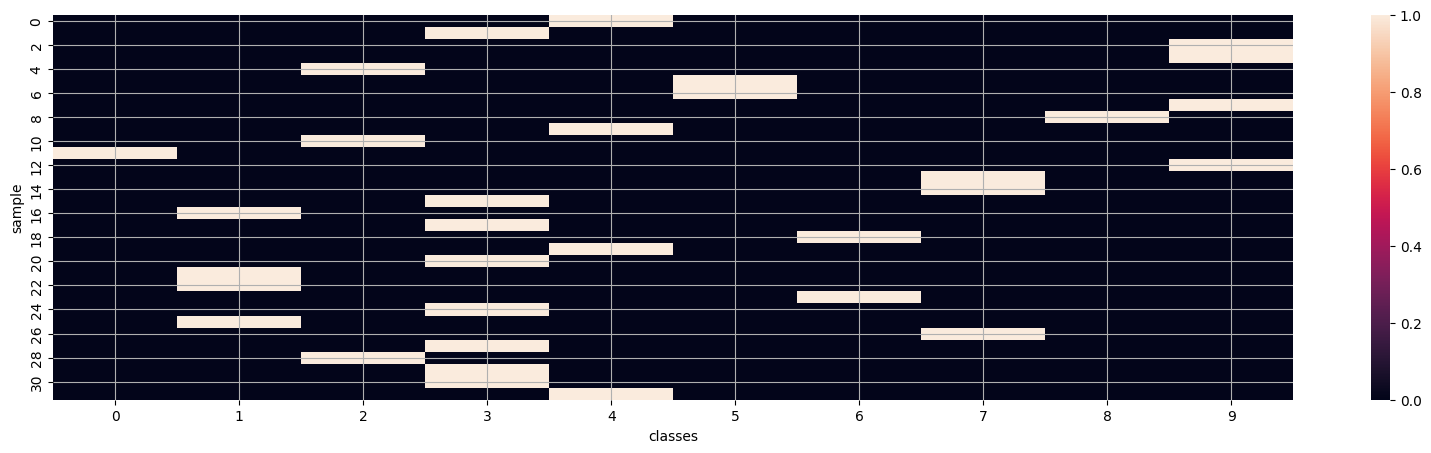

In [35]:
# This representation is called as one hot encoding
import seaborn as sns
plt.figure(figsize=(20,5))
sns.heatmap(ytrain)
plt.grid()
plt.ylabel('sample')
plt.xlabel('classes')

In [36]:
# You can see each sample has only one class 

In [37]:
# So Now we have our data
# We understand something about our data
# We will now move to convolutional neural network

## STEP 2: Create a Model 

In [42]:
# Let us talk  about convolution neural network first
# Try to understand following gif
# Input volume is our image, however the size here is just H x W x C, (height x width x channel) so assume this as a case for batch_size = 1

In [43]:
# Now let us do some practical approach
# Let us begin by examining convolution layer

In [44]:
layer = tf.keras.layers.Conv2D(filters=64, kernel_size=(7,7), strides=2, activation='relu', input_shape=(224,224,3))

In [45]:
out = layer(xtrain)
out.shape, xtrain.shape

(TensorShape([32, 109, 109, 64]), (32, 224, 224, 3))

Input size (224, 224, 3)
Output size  (109, 109, 64)


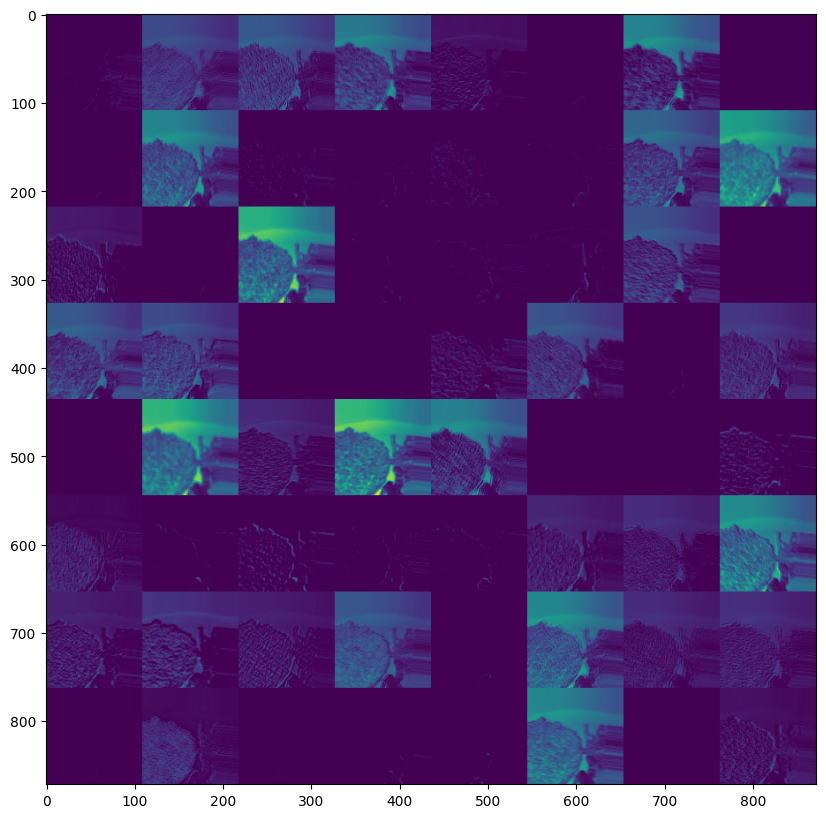

In [46]:
# lets see what happens to our first image
imageindex = 0 #First image
firstout = out[imageindex].numpy()
print('Input size', xtrain[0].shape)
print('Output size ',firstout.shape)

grid = []
for ind, i in enumerate(range(8,72,8)):
  grid.append(np.concatenate([firstout[:,:,j] for j in range(ind*8,ind*8+8)],1))
plt.figure(figsize=(10,10))
plt.imshow(np.concatenate(grid,0))

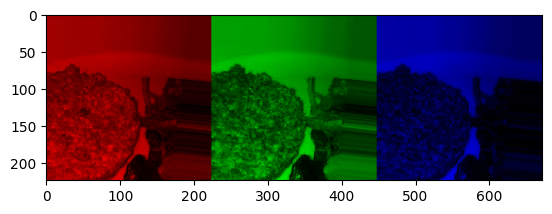

In [47]:
# Above visualization shows our 64 channels output from first convolution layer
# To make comparision with initial discussion about nature of data
# You can simply say our 'R','G','B' is now converted to above output
plt.imshow(np.concatenate([red,green,blue],1))

In [48]:
# Now let us make more comparision with this convolution layer with our example in given gif file
# Try to understand following comparision

# In example gif, Kernel has dimension of 3 by 3, ours has dimension 7 by 7
# In example gif, Kernel has two weights have 64 weights
# In example gif, input channel of image is 1, we have input channel as 3
# In example gif, used padding, we haven't used padding
# In example gif, input size is (1 x 5 x 5 x 1) that is one image, 5 height, 5 dimension and 1 color channel
                  # our has input (32, 214, 214, 3) that is 32 image, 214 height, 214 dimension and 3 color channel

# In example gif, dimension of kernel weight is (3, 3, 1, 2) that means, (3-> height, 3->weight, 1->input channel, 2-> output channel)
# In our example (7, 7, 3, 64), that means, (7-> height, 7->weight, 3->input channel, 64-> output channel)
w,b = layer.get_weights()
print(w.shape)

# In example gif, stride is 1, our case stride is 2, means we move kernel along side x and y direction with 2 steps at once
# In example gif, output is simply convolution but in our case output is followed by activation called as relu 
# Please follow lecture notes to understand about activation layers 
# Basic structure of convolution net will be 
# CONV - ACTIVATION -POOLING- CONV - ACTIVATION -POOLING- CONV - ACTIVATION ----------FLATTEN - DENSELAYER

# So we will follow above approach and try to create a simple model 

(7, 7, 3, 64)


**TASK1.1 : Create a Convolutional Neural Network | SCORE = 20**

In [59]:


# Now Follow following example from tensorflow
# https://www.tensorflow.org/tutorials/images/cnn
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers

# YOU ARE FREE TO CHOSE ANY TYPE OF ARCHITECTURE AS LONG AS IT WORKS
# Note: It is important to specify the correct input_shape in the first network
# layer to handle the deminsionality of the input.

# Keras model documentation: https://www.tensorflow.org/versions/r2.1/api_docs/python/tf/keras/Model
# Keras model example: https://www.tensorflow.org/tutorials/images/cnn

# SOLUTION
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((3, 3)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))


**TASK1.2 : Print model summary and answer questions | SCORE = 20**

In [60]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 220, 220, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 33, 33, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 69696)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     4,460,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,519,114 (17.24 MB)

 Trainable params: 4,519,114 (17.24 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
'''
Answer the questions:
1) How many convolutional layers in your model, what are their kernel, filter sizes? 
2) What does max_pooling layer do? 
3) How many output classes in your model? 
'''

'''
Your answer goes here: 
1) 3 convolutional layers with 5x5 @ 32 filters, 3x3 @ 64 filters, and 3x3 @ 128 filters
2) reduce the dimensions
3) 10
'''

'\nYour answer goes here: \n1) 3 convolutional layers with 5x5 @ 32 filters, 3x3 @ 64 filters, and 3x3 @ 128 filters\n2) reduce the dimensions\n3) 10\n'

## STEP 3: Train the model

**TASK1.3 : Compile the model | SCORE = 20**

In [62]:
# Keras complile method documentation: https://www.tensorflow.org/versions/r2.1/api_docs/python/tf/keras/Model#compile
# Keras compile example: https://www.tensorflow.org/tutorials/images/cnn

# NOTE: Use CategoricalCrossentropy instead of SparseCategoricalCrossentropy as loss

model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

**Task1.4: Fit the model | SCORE = 20**

In [63]:
# Keras fit method documentation: https://www.tensorflow.org/versions/r2.1/api_docs/python/tf/keras/Model#fit
# Keras compile example: https://www.tensorflow.org/tutorials/images/cnn

# Specify the following parameters:
# 1. The training data x: In this case the genarated train_data_gen will be used as our training set.
# 2. The training labels y: DO NOT SPECIFY. According to the Keras documentation:
#    "If x is a dataset, generator, or keras.utils.Sequence instance, y should not be specified (since targets will be obtained from x)."
# 3. The number of epochs: Let's use 10 epochs. More epochs could posibly yield a better accuracy, but the training takes a while to run.
# 4. The validation_data: For validation we can use the generated test_data_gen.
# 5. The validation_steps: This parameter specifies total number of steps (batches of samples) to draw before stopping when performing validation at the end of every epoch.
#    To speed up training let's limit our validation steps to 1000.
# 6. The steps_per_epoch: Total number of steps (batches of samples) before declaring one epoch finished and starting the next epoch.
#    Earlier, we calculated STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE). Let's use that constant here.

# Note: this can take a while to run. It took about 135 seconds per epoch when I ran it.

# history = model.fit_generator(
#         train_data_gen,
#         steps_per_epoch=STEPS_PER_EPOCH,
#         epochs=10,
#         validation_data=test_data_gen,
#         validation_steps=1000)
VALIDATION_STEPS = int(np.ceil(1000 / BATCH_SIZE))
STEPS_PER_EPOCH = int(np.ceil(image_count/BATCH_SIZE))

history = model.fit(
    x=train_data_gen, 
    epochs=10, 
    validation_data=test_data_gen, 
    validation_steps=VALIDATION_STEPS,
    steps_per_epoch=STEPS_PER_EPOCH)

Epoch 1/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 69s 244ms/step - accuracy: 0.1301 - loss: 2.3431 - val_accuracy: 0.2150 - val_loss: 2.1428
Epoch 2/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 68s 242ms/step - accuracy: 0.1940 - loss: 2.1581 - val_accuracy: 0.2650 - val_loss: 2.0033
Epoch 3/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 68s 242ms/step - accuracy: 0.2424 - loss: 2.0413 - val_accuracy: 0.3040 - val_loss: 1.9011
Epoch 4/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 68s 241ms/step - accuracy: 0.3003 - loss: 1.9348 - val_accuracy: 0.3750 - val_loss: 1.7507
Epoch 5/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 67s 236ms/step - accuracy: 0.3548 - loss: 1.8134 - val_accuracy: 0.4120 - val_loss: 1.6768
Epoch 6/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 68s 241ms/step - accuracy: 0.3635 - loss: 1.7748 - val_accuracy: 0.4120 - val_loss: 1.6134
Epoch 7/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 70s 250ms/step - accuracy: 0.3949 - loss: 1.6932 - val_accuracy: 0.4210 - val_loss: 1.5946
Epoch 8/10
282/282 ━━━━━━━━━━━━━━━━━━━━ 68s 240ms/step - accuracy: 0.4252 - loss: 1

## STEP 4: Model evaluation

**Task1.5: Evaluate the model | SCORE = 20**

In [ ]:
# TASK5 : EVALUATE YOUR MODEL

# Part 1: Plot a graph showing the training and validation accuracies in each epoch.
# Example: https://www.tensorflow.org/tutorials/images/cnn



# Part 2: Use the method evaluate to evaluate your model on the test set and print evaluation accuracy.
# Keras evaluate method documentation: https://www.tensorflow.org/versions/r2.1/api_docs/python/tf/keras/Model#evaluate
#
# Specify the following parameters:
# 1. The test data x: In this case the genarated test_data_gen will be used as our test set.
# 2. The number of steps: Total number of steps (batches of samples) before declaring the evaluation round finished.
#    We can limit the number of steps to 5000 to speed up evaluation.

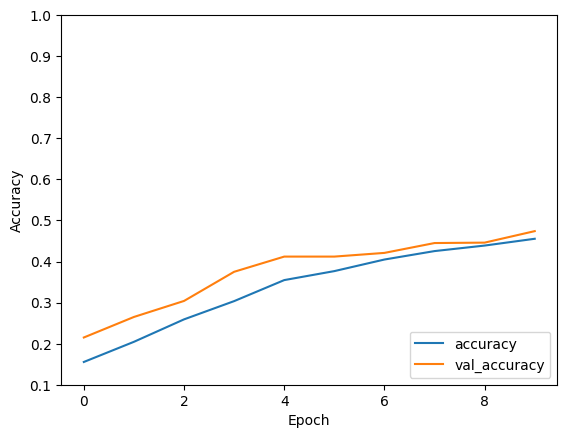

In [66]:
# Print evaluation plot
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

In [68]:
score = model.evaluate(test_data_gen, verbose=2)
print(score)

32/32 - 1s - 37ms/step - accuracy: 0.4740 - loss: 1.4774
[1.4774391651153564, 0.4740000069141388]
